<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

In [109]:
class FoodSource:
  def __init__(self, bounds, obj_function, target):
    self.din_1 = random.randrange(bounds[0])
    self.din_2 = random.randrange(bounds[1])
    self.din_5 = random.randrange(bounds[2])
    self.din_10 = random.randrange(bounds[3])
    self.din_20 = random.randrange(bounds[4])

    self.position = np.array([self.din_1, self.din_2, self.din_5, self.din_10, self.din_20])
    self.target = target
    self.obj_value = obj_function(self.position, self.target)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value)

In [110]:
def obj_function(position, target):
  alpha = 1 #parametar tezine vrednosti blizine resenja
  beta = 1  #parametar tezine broja novcica

  din_1 = position[0]
  din_2 = position[1]
  din_5 = position[2]
  din_10 = position[3]
  din_20 = position[4]

  value = 1*din_1 + 2*din_2 + 5*din_5 + 10*din_10 + 20*din_20
  count = din_1 + din_2 + din_5 + din_10 + din_20

  return alpha*abs(target - value) + beta*(count)

In [111]:
bounds = np.array([5, 10, 5, 15, 2])

In [112]:
def generate_new_solution(i, population, bounds, option):
  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  phi = random.randrange(0, 2) # 0 ili 1, tj ili dodam 1 ili oduzmem 1, nekao kao vrsta randomizacije
  if option == 'average':
    new_j = math.floor((population[i].position[j] + population[partner].position[j]) / 2) + phi
  elif option == 'max':
    new_j = max(population[i].position[j], population[partner].position[j]) + phi

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], 0, bounds[j])

  new_objective_value = obj_function(population[i].position, population[i].target)

  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial += 1

In [120]:
POPULATION_SIZE = 10
NUM_OF_ITERATIONS = 20
LIMIT = 5
target = 137

population = [FoodSource(bounds, obj_function, target) for _ in range(POPULATION_SIZE)]

best_solution = min(population)

obj_values = []
fitness_values = []

for k in range(NUM_OF_ITERATIONS):
  #### Employed Bee Phase ####
  for i in range(POPULATION_SIZE):
    generate_new_solution(i, population, bounds, 'max')

  #### Onlooker Bee Phase ####
  max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
  for i in range(POPULATION_SIZE):
    population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1

  m = 0
  n = 0

  while m < POPULATION_SIZE and n < POPULATION_SIZE:
    rand_value = random.uniform(0, 1)
    if rand_value < population[n].probability:
      generate_new_solution(n, population, bounds, 'max')
      m += 1
    n = (n % POPULATION_SIZE) + 1

  best_solution = min(min(population), best_solution)

  #### Scout Bee Phase ####
  max_index = -1
  max_trial = float('-inf')
  for index, p in enumerate(population):
    if p.trial > max_trial:
      max_trial = p.trial
      max_index = index


  if population[max_index].trial > LIMIT:
    population[max_index] = FoodSource(bounds, obj_function, target)

  best_solution = min(min(population), best_solution)

  obj_values.append(best_solution.obj_value)
  print
  fitness_values.append(best_solution.fitness)

print("position: ", [i for i in best_solution.position])
print("objective value: ", best_solution.obj_value)
print("fitness value: ", best_solution.fitness)

position:  [1, 6, 1, 10, 1]
objective value:  20
fitness value:  0.047619047619047616


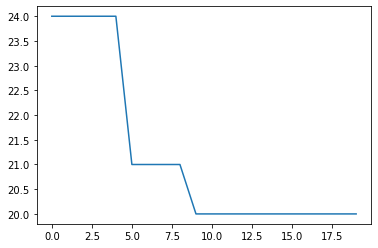

In [122]:
plt.plot(range(NUM_OF_ITERATIONS), obj_values)

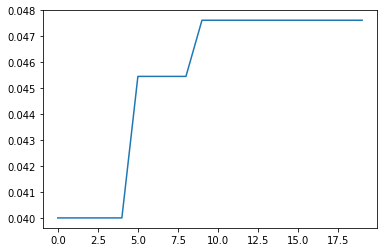

In [123]:
plt.plot(range(NUM_OF_ITERATIONS), fitness_values)